In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris
import iris.quickplot as qplt
import numpy

## Load the data

In [2]:
with iris.FUTURE.context(cell_datetime_objects=True):
    cube = iris.load_cube('example_data.nc', 'rotated_northward_wind')

cube = iris.util.squeeze(cube)
print cube

rotated_northward_wind / (m s**-1)  (latitude: 241; longitude: 480)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          time: 2006-06-22 06:00:00
     Attributes:
          CDI: Climate Data Interface version 1.6.3 (http://code.zmaw.de/projects/cdi...
          CDO: Climate Data Operators version 1.6.3 (http://code.zmaw.de/projects/cdo...
          Conventions: CF-1.0
          history: Tue Aug 04 12:29:59 2015: cdo seldate,2006-06-22 ../data_processing/test_vrot.nc...
          invalid_standard_name: rotated_northward_wind
          level: 500hPa
          nco_openmp_thread_number: 1
          notes: North Pole at lat=20.0, lon=260.0. Data defined on rotated grid.


## Show the data

In [3]:
cmap = 'RdBu_r'
ticks = numpy.arange(-32, 36, 4)

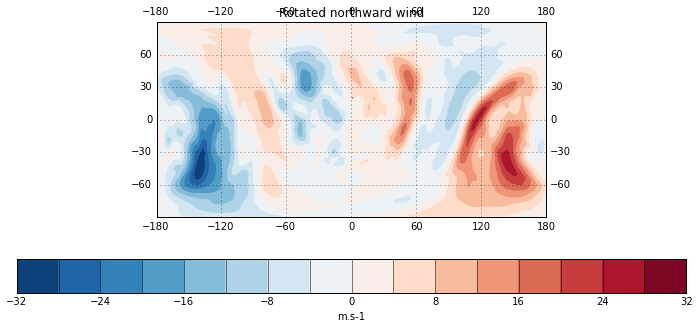

In [4]:
%matplotlib inline

fig = plt.figure(figsize=(12, 5))

ax = plt.subplot(111)
qplt.contourf(cube, cmap=cmap, levels=ticks)
plt.gca().gridlines(draw_labels=True)

iplt.show()

## Plot on rotated grid

The latitude/longitude grid in the input file actually refers to rotated grid (`ccrs.RotatedPole(260, 20)`), so I want to plot the data on that grid...

In [5]:
def create_plot(cube, in_proj, out_proj, method):
   
    fig = plt.figure(figsize=(12, 5))

    ax = plt.subplot(111, projection=out_proj)
    x = cube.coord('longitude').points
    y = cube.coord('latitude').points

    
    if method == 'contourf':
        cf = ax.contourf(x, y, cube.data, levels=ticks, cmap=cmap,
                         transform=in_proj)
    elif method == 'pcolormesh':
        cf = ax.pcolormesh(x, y, cube.data, vmin=ticks[0], vmax=ticks[-1], cmap=cmap,
                           transform=in_proj)
    
    plt.colorbar(cf)
    plt.gca().coastlines()

    iplt.show()

`contourf` works fine for the default central rotated longitude...

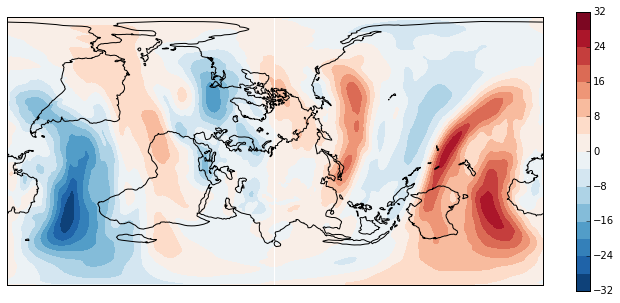

In [7]:
in_proj = ccrs.RotatedPole(260, 20)
out_proj = ccrs.RotatedPole(260, 20)

create_plot(cube, in_proj, out_proj, 'contourf')

But I want to move the central rotated longitude to better highlight the important aspects of the data. This works fine for a `pcolormesh` plot...

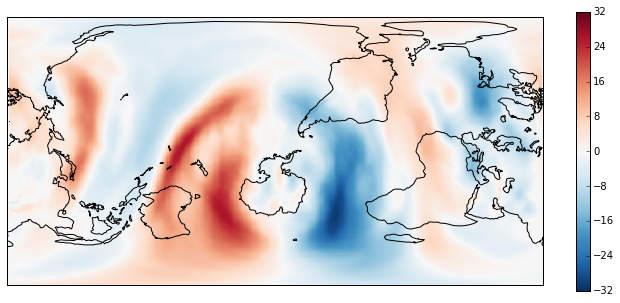

In [8]:
in_proj = ccrs.RotatedPole(260, 20)
out_proj = ccrs.RotatedPole(260, 20, central_rotated_longitude=180)

create_plot(cube, in_proj, out_proj, 'pcolormesh')

But fails for a `contourf` plot... 

In [9]:
in_proj = ccrs.RotatedPole(260, 20)
out_proj = ccrs.RotatedPole(260, 20, central_rotated_longitude=180)

create_plot(cube, in_proj, out_proj, 'contourf')

RuntimeError: Unidentified problem with geometry, linestring being re-added. Please raise an issue.

I can successfully move the central rotated longitude on contourf plots using different data files, but I can't for the life of me figure out why this particular file isn't working!